In [1]:
import oot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%load_ext autoreload
%autoreload 2

In [96]:
planet=oot.planet()
planet.M=1 #sun-like star
planet.R=1
planet.Mp=0.001 #jupiter-like planet
planet.Rp=0.1
planet.a=10 #close eccentric orbit
planet.e=0.3
planet.vTheta=np.pi/2 #viewed from an oblique angle
planet.vPhi=np.pi/4

period=oot.findT(2*np.pi,planet)
ts=np.linspace(-period/2,period/2,1000)

In [88]:
deltaSum=oot.deltaSum(ts,planet)
deltaTide=oot.deltaTide(ts,planet)
deltaBeam=oot.deltaBeam(ts,planet)
deltaReflect=oot.deltaReflect(ts,planet)

deltaPlot=plt.gca()
deltaPlot.plot(365*ts,1e6*deltaSum,c='k',lw=4)
deltaPlot.plot(365*ts,1e6*deltaTide,c='darkred',lw=3)
deltaPlot.plot(365*ts,1e6*deltaBeam,c='red',lw=3)
deltaPlot.plot(365*ts,1e6*deltaReflect,c='orange',lw=3)
deltaPlot.set_xlabel('time, relative to periapse (days)')
deltaPlot.set_ylabel(r'$\delta$ (ppm)')
plt.savefig('examplePlot.png')

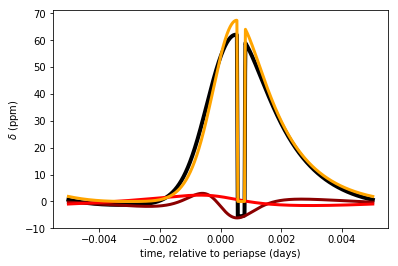

In [97]:
planet.beta=2 #star with a smaller response to tides
planet.Ag=0.5 #with a particularly reflective companion

deltaSum=oot.deltaSum(ts,planet)
deltaTide=oot.deltaTide(ts,planet)
deltaBeam=oot.deltaBeam(ts,planet)
deltaReflect=oot.deltaReflect(ts,planet)

deltaPlot=plt.gca()
deltaPlot.plot(ts,1e6*deltaSum,c='k',lw=4)
deltaPlot.plot(ts,1e6*deltaTide,c='darkred',lw=3)
deltaPlot.plot(ts,1e6*deltaBeam,c='red',lw=3)
deltaPlot.plot(ts,1e6*deltaReflect,c='orange',lw=3)
deltaPlot.set_xlabel('time, relative to periapse (days)')
deltaPlot.set_ylabel(r'$\delta$ (ppm)')
plt.show()

In [5]:
planet=oot.planet()
planet.M=1.30 #sun-like star
planet.R=1.53
planet.Mp=0.01 #jupiter-like planet
planet.Rp=0.66
planet.a=80 #close eccentric orbit
planet.e=0.925
planet.Ag=0.2
planet.vTheta=np.pi/2 #viewed from an oblique angle
planet.vPhi=1.6*np.pi

period=oot.findT(2*np.pi,planet)
ts=np.linspace(-1/365,0.75/365,100)

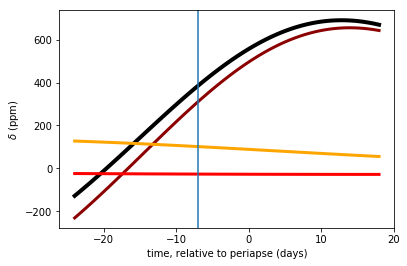

In [6]:
deltaSum=oot.deltaSum(ts,planet)
deltaTide=oot.deltaTide(ts,planet)
deltaBeam=oot.deltaBeam(ts,planet)
deltaReflect=oot.deltaReflect(ts,planet)

deltaPlot=plt.gca()
deltaPlot.plot(365*ts*24,1e6*deltaSum,c='k',lw=4)
deltaPlot.plot(365*ts*24,1e6*deltaTide,c='darkred',lw=3)
deltaPlot.plot(365*ts*24,1e6*deltaBeam,c='red',lw=3)
deltaPlot.plot(365*ts*24,1e6*deltaReflect,c='orange',lw=3)
deltaPlot.axvline(365*24*oot.findT(oot.findEtaPhi(planet.vPhi,planet),planet))
#deltaPlot.axvline(24*0.281,c='k')
#deltaPlot.axvline(365*24*oot.findT(oot.findEtaPhi(planet.vPhi-np.pi,planet),planet))
deltaPlot.set_xlabel('time, relative to periapse (days)')
deltaPlot.set_ylabel(r'$\delta$ (ppm)')
plt.show()

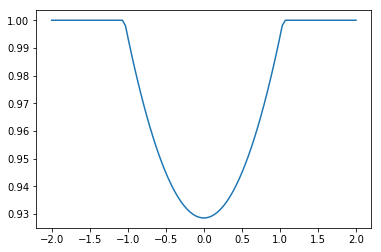

In [7]:
def stupid(d,R,Rp,alpha):
    pre=(Rp/R)**2
    num=1-(alpha/R**2)*(d**2 + (Rp**2)/2)
    denom=(1-alpha/2)
    num[num<0]=0
    return (denom-pre*num)/denom
R=1
Rp=0.2
alpha=0.9
ds=np.linspace(-R-5*Rp,R+5*Rp,100)
delta=stupid(ds,R,Rp,alpha)
plt.plot(ds,delta)
plt.show()

In [3]:
adam=np.genfromtxt('/Users/Zephyr/Desktop/KIC4459068@24.9552.csv',skip_header=2,delimiter=',')

In [4]:
period=24.9552
ts=adam[:,3]
flux=adam[:,0]
smoothFlux=adam[:,5]
transit=ts[np.argmin(flux)]
ts=(ts-transit+0.5*period)%period

In [12]:
planet=oot.planet()
planet.M=2 #sun-like star
planet.R=3
planet.Mp=0.002 #jupiter-like planet
planet.Rp=0.3
planet.a=42 #close eccentric orbit
planet.e=0.9
planet.Ag=0.2
planet.vTheta=np.pi/2 #viewed from an oblique angle
planet.vPhi=0.2*np.pi

ootPeriod=oot.findT(2*np.pi,planet)
print((ootPeriod-period)/period)
ootTs=np.linspace(-ootPeriod/2,ootPeriod/2,2560)
#deltaSum=oot.deltaSum(ootTs,planet)
deltaTide=oot.deltaTide(ootTs,planet)
#deltaBeam=oot.deltaBeam(ootTs,planet)
#deltaReflect=oot.deltaReflect(ootTs,planet)
ootTs=(365*(ootTs+0.5*ootPeriod)) % period

-0.997553991732


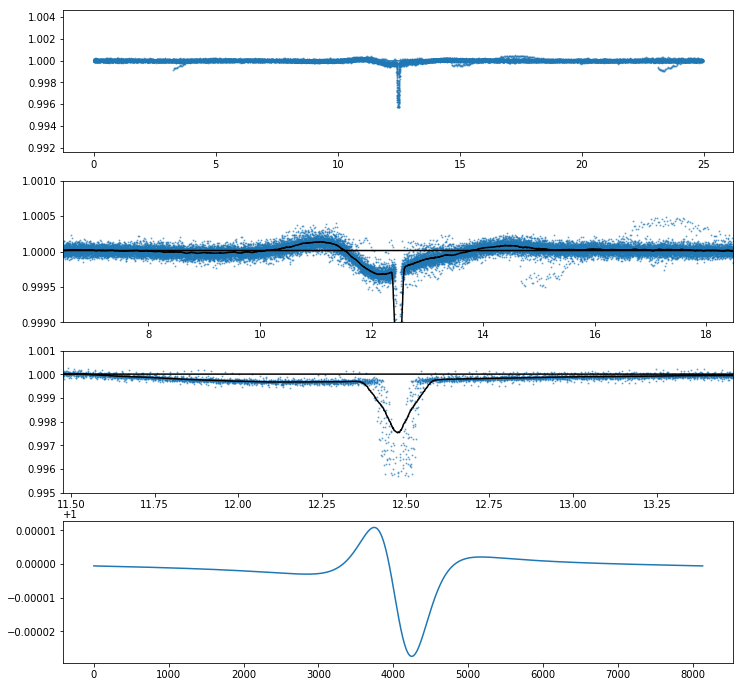

In [9]:
lFig = plt.figure(figsize=(12,12))
lGrid=mpl.gridspec.GridSpec(4,1)
wholePlot=plt.subplot(lGrid[0,0])
wholePlot.scatter(ts,flux,s=1,alpha=0.5)
wholePlot.plot(ootTs,1+deltaTide)

tidePlot=plt.subplot(lGrid[1,0])
tidePlot.scatter(ts,flux,s=1,alpha=0.5)
tidePlot.plot(ts,smoothFlux,c='k')
tidePlot.set_xlim(0.5*period-6,0.5*period+6)
tidePlot.set_ylim(0.999,1.001)

transitPlot=plt.subplot(lGrid[2,0])
transitPlot.scatter(ts,flux,s=1,alpha=0.5)
transitPlot.plot(ts,smoothFlux,c='k')
transitPlot.set_xlim(0.5*period-1,0.5*period+1)
transitPlot.set_ylim(0.995,1.001)

sparePlot=plt.subplot(lGrid[3,0])
sparePlot.plot(365*ootTs,1+deltaTide)

plt.show()

In [33]:
ootTs=np.linspace(-ootPeriod/2,ootPeriod/2,2560)
exactDeltas=oot.deltaTide(ootTs,planet)

In [30]:
badDeltas=oot.deltaTide(ootTs,planet)

In [48]:
approxDeltas=oot.deltaTide(ootTs,planet)

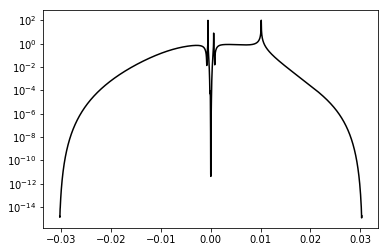

In [49]:
plt.semilogy(ootTs,np.abs(exactDeltas-approxDeltas)/np.abs(exactDeltas),c='k')
#plt.plot(ootTs,badDeltas,c='b')
#plt.plot(ootTs,approxDeltas,c='r',ls='--')
plt.show()

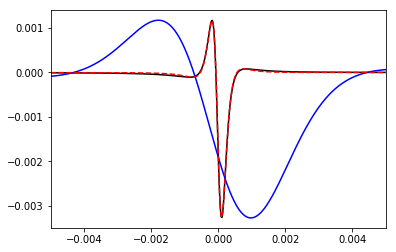

In [50]:
plt.plot(ootTs,exactDeltas,c='k')
plt.plot(ootTs,badDeltas,c='b')
plt.plot(ootTs,approxDeltas,c='r',ls='--')
plt.xlim(-0.005,0.005)
plt.show()

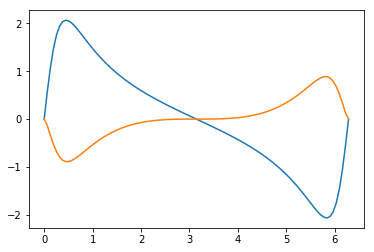

In [46]:
etas=np.linspace(0,2*np.pi,100)
e=0.9
eta1=e*np.sin(etas)/(1-e*np.cos(etas))
eta3=(e*np.sin(etas+eta1) - eta1)/(1-e*np.cos(etas+eta1))
plt.plot(etas,eta1)
plt.plot(etas,eta3)
plt.show()